# Curso de Capacitación en Machine Learning para la Industria (ML CETAM) - Sesión 4 (Tarea)

<img src='http://ia.inf.pucp.edu.pe/static/images/logo.svg' width=300px>
<img src='https://dci.pucp.edu.pe/wp-content/uploads/2014/02/logo-color-pucp1.gif' width=200px>


PhD. Edwin Villanueva, PhD. Soledad Espezua, BSc. Daniel Saromo

<font color='#008B72'> Modelos de clasificación: Predicción de la edad de abalones </font>

## Caso: Determinación de la edad de un abalón usando sus anillos internos: Abalone Dataset

Fuente del dataset: https://archive.ics.uci.edu/ml/datasets/Abalone

<img src='https://mnc-asia.com/wp-content/uploads/2018/04/ormeaux-sauvages-1kg.jpg' width=200px>

La edad de un abalón es determinada al cortar su caparazón a través de su cono, teñirlo y contar el número de anillos usando una lupa o un microscopio. Otras medidas, que son más fáciles de obtener, son usadas para predecir dicha edad. Información adicional, como patrones de climma y localización (por lo tanto, disponibilidad de alimento), también pueden ser usados para resolver el problema de predicción.

**Información de los atributos:**

Se indican el nombre del atributo, su tipo, la unidad de medida y una pequeña descripción. El número de anillos es el valor a predecir (clasificación).

```
Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years
```

De acuerdo al caso planteado, el objetivo del proyecto es predecir la edad de un abalón usando mediciones físicas que son fáciles de realizar.

Completar con su código los campos indicados y subir su notebook solucionado a la plataforma PAIDEIA.

El formato del nombre del archivo es: `Desafio4_APELLIDOPATERNO_NOMBRE.ipynb`. Respetar los lineamientos de la entrega de archivo influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No subir el archivo `abalones.csv`, solamente se debe subir el notebook (extensión `ipynb`).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('abalones.csv', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 1) Preprocesamiento de datos
Se tienen las siguientes etapas:

### Transformación de datos cualitativos a cuantitativos

In [ ]:
from sklearn import preprocessing
def encode_features(df):
    features = ['Sex']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df
    
data_train = encode_features(data)
data_train.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Revisando balanceo de los datos

In [ ]:
data.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

### Simplificación del problema de predicción
Se pide extraer un subconjunto de datos, de manera que el nuevo dataset esté conformado por las 11 categorías con mayor cantidad de muestras (a.k.a. filas o samples). 

Hint: Primera hoja de [este documento](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

In [ ]:
## TO DO ##
#sub_data = ...
#...
###########

sub_data.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: Rings, dtype: int64

In [ ]:
assert (sub_data.shape[0]==3842),'La cantidad de filas es incorrecta'
assert (sub_data.shape[1]==9),'La cantidad de columnas es incorrecta'

### Separación del dataset en conjuntos de entrenamiento (train) y prueba (test)
La proporción del dataset que debe estar en el subconjunto de prueba debe ser de la **cuarta parte** del total.

In [ ]:
X_all = ... #dropeamos la columna con la variable a predecir
y_all = ... #nos quedamos únicamente con la columna con la variable a predecir

In [ ]:
from sklearn.model_selection import train_test_split

num_test = ...
X_train, X_test, y_train, y_test = ...

In [ ]:
X_train.shape

(2881, 8)

In [ ]:
assert (X_train.shape[0]==2881),'La cantidad de datos es incorrecta'
assert (X_train.shape[1]==8),'La cantidad de características es incorrecta'

## 2) Árbol de Clasificación

In [ ]:
#@title Función para mostrar el árbol de decisión
# No es necesario que modifique esta función!
def draw_tree(tree, df):
    import graphviz
    from sklearn.tree import export_graphviz
    s = export_graphviz(tree, out_file=None, feature_names=df.columns, filled=True)
    return graphviz.Source(s)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Entrenamos un arbol con poca profundidad, para visualizarlo cómodamente:
# Entrenar un DecisionTreeClassifier() con profundidad máxima de 3 y con los demás parámetros por defecto (solo debe ingresar el argumento `max_dept`)
m = ...
m.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
indicePrueba = 27 
muestraPrueba = X_test.iloc[indicePrueba]
targetPrueba  = y_test.iloc[indicePrueba]

In [ ]:
muestraPrueba

Sex               0.0000
Length            0.6450
Diameter          0.5000
Height            0.2000
Whole weight      1.4285
Shucked weight    0.6390
Viscera weight    0.3050
Shell weight      0.3600
Name: 2253, dtype: float64

In [ ]:
#comparamos la predicción con el target que debería resultar
m.predict(muestraPrueba.values.reshape(1, -1)), targetPrueba 
#como el modelo no es 100% perfecto, a veces no coinciden estos valores. Por ejm, probar con indicePrueba = 23

(array([11]), 11)

In [ ]:
m.score(X_train, y_train)

0.30336688649774385

In [ ]:
m.score(X_test, y_test)

0.25078043704474506

In [ ]:
X_train_np = X_train.values
X_test_np  = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

In [ ]:
#@title Interpretación de la estructura interna del árbol
estimator = m

# Adaptado de: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] (%s) <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 X_train.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 15 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 7] (Shell weight) <= 0.1444999948143959 else to node 8.
	node=1 test node: go to node 2 if X[:, 2] (Diameter) <= 0.2224999964237213 else to node 5.
		node=2 test node: go to node 3 if X[:, 2] (Diameter) <= 0.19249999523162842 else to node 4.
			node=3 leaf node.
			node=4 leaf node.
		node=5 test node: go to node 6 if X[:, 7] (Shell weight) <= 0.11475000157952309 else to node 7.
			node=6 leaf node.
			node=7 leaf node.
	node=8 test node: go to node 9 if X[:, 7] (Shell weight) <= 0.25175000727176666 else to node 12.
		node=9 test node: go to node 10 if X[:, 5] (Shucked weight) <= 0.377250000834465 else to node 11.
			node=10 leaf node.
			node=11 leaf node.
		node=12 test node: go to node 13 if X[:, 7] (Shell weight) <= 0.35975000262260437 else to node 14.
			node=13 leaf node.
			node=14 leaf node.



In [ ]:
y_train.value_counts().sort_index()

5      85
6     191
7     302
8     444
9     505
10    477
11    337
12    209
13    150
14    102
15     79
Name: Rings, dtype: int64

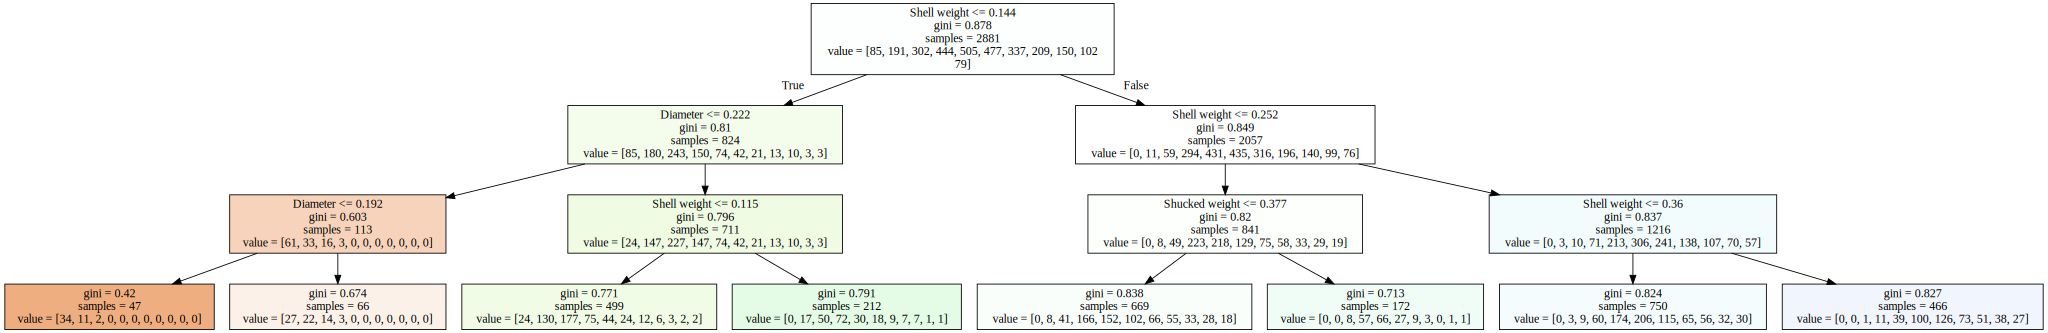

In [ ]:
draw_tree(m, X_test) #hover leaf to see node number

In [ ]:
X_all.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [ ]:
from sklearn.tree import export_text
columnas = [col for col in X_all.columns]# observar en la fila anterior el objeto que recorna X_all.columns
r = export_text(m, feature_names=columnas)

print(r)

print()

print("Las columnas son:", columnas)

|--- Shell weight <= 0.14
|   |--- Diameter <= 0.22
|   |   |--- Diameter <= 0.19
|   |   |   |--- class: 5
|   |   |--- Diameter >  0.19
|   |   |   |--- class: 5
|   |--- Diameter >  0.22
|   |   |--- Shell weight <= 0.11
|   |   |   |--- class: 7
|   |   |--- Shell weight >  0.11
|   |   |   |--- class: 8
|--- Shell weight >  0.14
|   |--- Shell weight <= 0.25
|   |   |--- Shucked weight <= 0.38
|   |   |   |--- class: 8
|   |   |--- Shucked weight >  0.38
|   |   |   |--- class: 9
|   |--- Shell weight >  0.25
|   |   |--- Shell weight <= 0.36
|   |   |   |--- class: 10
|   |   |--- Shell weight >  0.36
|   |   |   |--- class: 11


Las columnas son: ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


¿Cómo se calcula la predicción de una hoja de la fila inferior que contiene más de un valor de la variable target? Se considera que la salida es aquella categoría que tenga la mayor cantidad de elementos, porque es más probable que la muestra pertenezca a dicha categoría.

Ver la ejecución de `y_train.value_counts().sort_index()`, junto con la estructura del árbol exportada en formato de texto (en la celda anterior a esta).

Veamos un ejemplo.

In [ ]:
#@title Hagamos una predicción para la muestra de índice `indicePrueba` { form-width: "300px" }

sample_id = indicePrueba

# Let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(X_test_np)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(X_test_np)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.


node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test_np[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test_np[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test_np[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))
    
print()
print("For the sample %s, the predicted class is %s." % (sample_id, targetPrueba))

# For a group of samples, we have the following common node.
#sample_ids = [0, 1]
#common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids))

#common_node_id = np.arange(n_nodes)[common_nodes]

#print("\nThe following samples %s share the node %s in the tree"       % (sample_ids, common_node_id))
#print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

Rules used to predict sample 27: 
decision id node 0 : (X_test_np[27, 7] (= 0.36) > 0.1444999948143959)
decision id node 8 : (X_test_np[27, 7] (= 0.36) > 0.25175000727176666)
decision id node 12 : (X_test_np[27, 7] (= 0.36) > 0.35975000262260437)

For the sample 27, the predicted class is 11.


Verificamos que cumple con la gráfica a colores mostrada, y siguiendo las reglas del árbol exportado como texto.

## 3) Comparando modelos de predicción

Evaluar el dataset usando crosvalidación para los siguientes algoritmos de clasificación: `LogisticRegression()`, `KNeighborsClassifier()`, `DecisionTreeClassifier()` y `SVC()`. Hacer una crossvalidación con 7 folds y `random_state=seed`. Usar [`f1_macro`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) como [métrica de scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).



Debe mostrar un resultado como este (con la media y la desviación estándar de la precisión):

```
Regresión Logística: 0.987654 (0.123456)
K vecinos más cercanos: 0.987654 (0.123456)
Árbol: 0.987654 (0.123456)
SVM: 0.987654 (0.123456)
```
Luego, realizar las siguientes tareas:

1. Escoger el algoritmo que tenga el mejor score.
2. Luego, ajustar un modelo basado en el algoritmo seleccionado.
3. Después, evaluar dicho modelo entrenado en la data de test.
4. Finalmente, mostrar la matriz de confusión indicando en cuál clase se erra más (es decir, para cuál de las clases el modelo entrenado predice la mayor cantidad de veces una clase incorrecta).
